In [1]:
from lvmtipo.actors import lvm

await lvm.sci.agc.start()
# we do also connect to the telscope for a status - position
await lvm.sci.pwi.start()
await lvm.sci.pwi.status()

{'is_tracking': False,
 'is_connected': False,
 'is_slewing': False,
 'is_enabled': False,
 'ra_j2000_hours': 0.0,
 'dec_j2000_degs': 0.0,
 'ra_apparent_hours': 0.0,
 'dec_apparent_degs': 0.0,
 'altitude_degs': 0.0,
 'azimuth_degs': 0.0,
 'field_angle_rate_at_target_degs_per_sec': 0.0,
 'field_angle_here_degs': 0.0,
 'field_angle_at_target_degs': 0.0,
 'axis0': {'dist_to_target_arcsec': 0.0,
  'is_enabled': False,
  'position_degs': 0.0,
  'rms_error_arcsec': 0.0,
  'servo_error_arcsec': 0.0},
 'axis1': {'dist_to_target_arcsec': 0.0,
  'is_enabled': False,
  'position_degs': 0.0,
  'rms_error_arcsec': 0.0,
  'servo_error_arcsec': 0.0},
 'model': {'filename': '',
  'num_points_enabled': 0,
  'num_points_total': 0,
  'rms_error_arcsec': 0.0},
 'geometry': 0}

east: /data/lvm/sci/agcam/east/20220727/lvm.sci.agcam.east_00000001.fits, west: /data/lvm/sci/agcam/west/20220727/lvm.sci.agcam.west_00000001.fits


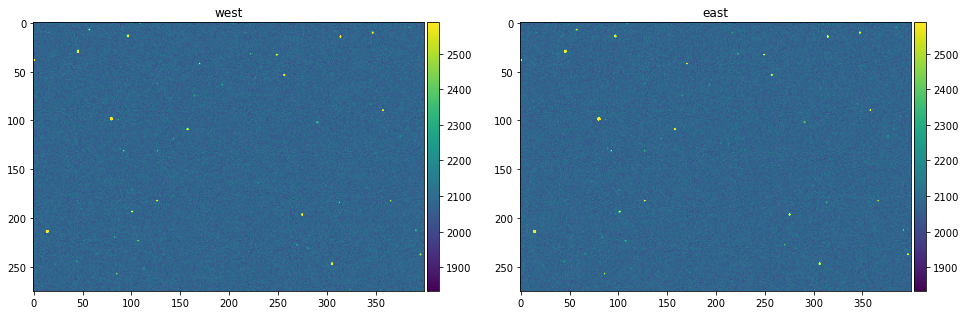

east: /data/lvm/sci/agcam/east/20220727/lvm.sci.agcam.east_00000002.fits, west: /data/lvm/sci/agcam/west/20220727/lvm.sci.agcam.west_00000002.fits


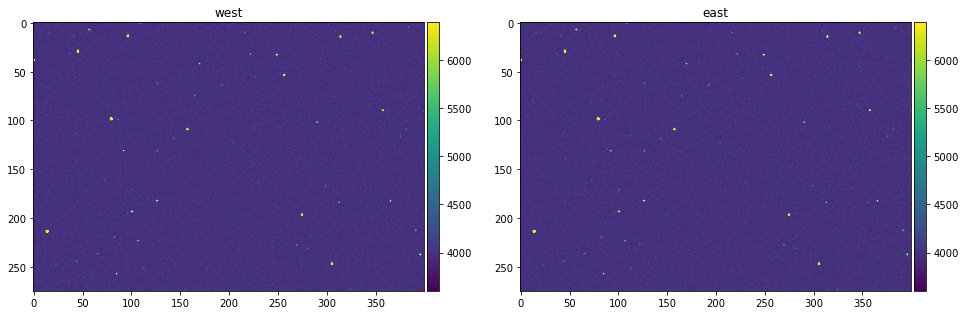

In [2]:
%matplotlib inline
from plotimg import plot_images, fits

for e in [1.,5.]:
    ef, wf = (await lvm.sci.agc.expose(e)).flatten().unpack("east.filename", "west.filename") 
    print(f"east: {ef}, west: {wf}")
    plot_images(fits.getdata(ef, ext=0), fits.getdata(wf, ext=0))

In [3]:
await lvm.sci.foc.start()

east: /data/lvm/sci/agcam/east/20220727/lvm.sci.agcam.east_00000003.fits, west: /data/lvm/sci/agcam/west/20220727/lvm.sci.agcam.west_00000003.fits


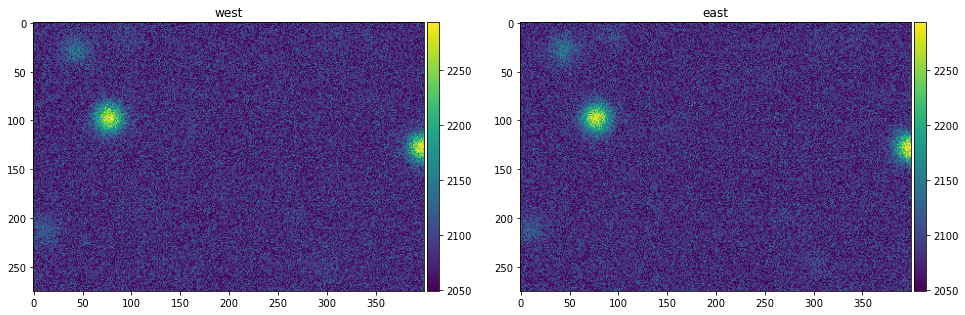

east: /data/lvm/sci/agcam/east/20220727/lvm.sci.agcam.east_00000004.fits, west: /data/lvm/sci/agcam/west/20220727/lvm.sci.agcam.west_00000004.fits


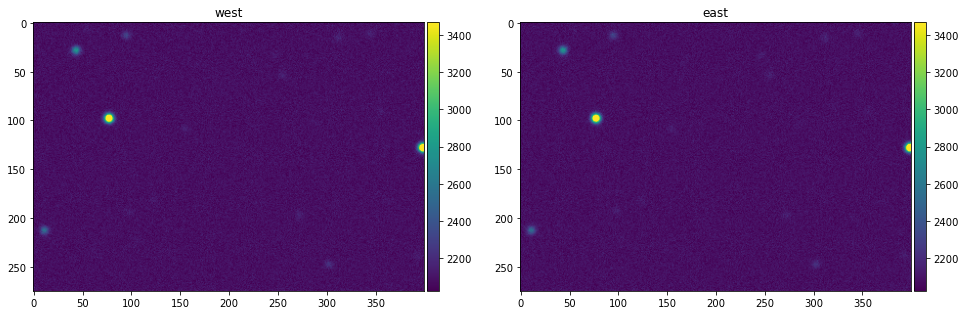

east: /data/lvm/sci/agcam/east/20220727/lvm.sci.agcam.east_00000005.fits, west: /data/lvm/sci/agcam/west/20220727/lvm.sci.agcam.west_00000005.fits


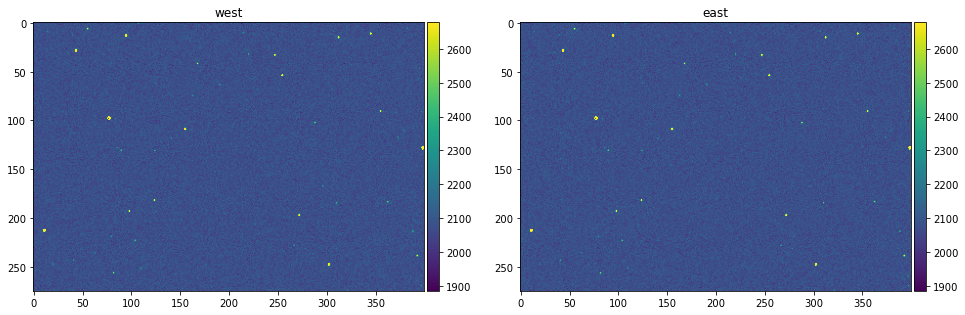

{'Reachable': True,
 'AtHome': True,
 'Moving': False,
 'PositionSwitchStatus': 254,
 'Position': 0.0,
 'DeviceEncoder': {'Position': 0.0, 'Unit': 'STEPS'},
 'Velocity': 0.0,
 'AtLimit': False}

In [4]:
%matplotlib inline

for p in [600, 300, 0]:
    await lvm.sci.foc.moveAbsolute(p)
    ef, wf = (await lvm.sci.agc.expose(1)).flatten().unpack("east.filename", "west.filename") 
    print(f"east: {ef}, west: {wf}")
    plot_images(fits.getdata(ef, ext=0), fits.getdata(wf, ext=0))

await lvm.sci.foc.moveToHome()

In [5]:
from lvm.tel.focus import Focus
from logging import DEBUG, INFO

telsys = await lvm.sci.start()
focus = Focus(telsys, level = DEBUG)

await focus.offset(100) 

await focus.nominal(20.4)

await focus.fine(1)


[DEBUG]: foc move to 100 um
[DEBUG]: foc move to 400
[DEBUG]: expose 1
[DEBUG]: foc move to 200
[DEBUG]: expose 1
[DEBUG]: foc move to 100
[DEBUG]: expose 1
[DEBUG]: foc move to 0
[DEBUG]: expose 1
[DEBUG]: foc move to -100
[DEBUG]: expose 1
[INFO]: {'east': ['/data/lvm/sci/agcam/east/20220727/lvm.sci.agcam.east_00000006.fits', '/data/lvm/sci/agcam/east/20220727/lvm.sci.agcam.east_00000007.fits', '/data/lvm/sci/agcam/east/20220727/lvm.sci.agcam.east_00000008.fits', '/data/lvm/sci/agcam/east/20220727/lvm.sci.agcam.east_00000009.fits', '/data/lvm/sci/agcam/east/20220727/lvm.sci.agcam.east_00000010.fits'], 'west': ['/data/lvm/sci/agcam/west/20220727/lvm.sci.agcam.west_00000006.fits', '/data/lvm/sci/agcam/west/20220727/lvm.sci.agcam.west_00000007.fits', '/data/lvm/sci/agcam/west/20220727/lvm.sci.agcam.west_00000008.fits', '/data/lvm/sci/agcam/west/20220727/lvm.sci.agcam.west_00000009.fits', '/data/lvm/sci/agcam/west/20220727/lvm.sci.agcam.west_00000010.fits']}
